In [3]:
import os
import zipfile as zip

import pandas as pd

In [5]:
folder = 'data/censo-educacao-superior/'

files = os.listdir(folder)
df = pd.DataFrame()

for file in files:
    with zip.ZipFile(folder + file, 'r') as zip_file:
        for name in zip_file.namelist():
            if name.find('MICRODADOS_CADASTRO_CURSOS_2020') > 0:
                with zip_file.open(name) as csv_file:
                    df_tmp = pd.read_csv(csv_file, encoding='latin1', sep=';')
                    df = df.append(df_tmp)
            else:
                pass

/tmp/ipykernel_22056/1368418920.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_tmp)


In [6]:
df.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_ORGANIZACAO_ACADEMICA,...,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
0,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Água Boa,5100201.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Água Boa,5100201.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Água Boa,5100201.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Alto Araguaia,5100300.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Arenápolis,5101308.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.tail()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,IN_CAPITAL,TP_ORGANIZACAO_ACADEMICA,...,QT_MAT_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,QT_ATIV_EXTRACURRICULAR,QT_ING_ATIV_EXTRACURRICULAR,QT_MAT_ATIV_EXTRACURRICULAR,QT_CONC_ATIV_EXTRACURRICULAR,QT_MOB_ACADEMICA,QT_ING_MOB_ACADEMICA,QT_MAT_MOB_ACADEMICA,QT_CONC_MOB_ACADEMICA
335624,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Rondonópolis,5107602.0,0.0,1,...,12,1,41,3,40,4,0,0,0,0
335625,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Rondonópolis,5107602.0,0.0,1,...,48,8,21,0,21,2,0,0,0,0
335626,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Rondonópolis,5107602.0,0.0,1,...,23,2,77,0,74,6,0,0,0,0
335627,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Rondonópolis,5107602.0,0.0,1,...,8,1,42,1,40,0,0,0,0,0
335628,2020,Centro-Oeste,5.0,Mato Grosso,MT,51.0,Rondonópolis,5107602.0,0.0,1,...,19,11,79,5,77,10,0,0,0,0


In [10]:
df.shape

(335629, 196)

In [12]:
df['QT_VG_TOTAL'].describe()

count    335629.000000
mean         58.484434
std        1126.038638
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      149108.000000
Name: QT_VG_TOTAL, dtype: float64

In [17]:
tabela = df['NO_MUNICIPIO'].drop_duplicates()
tabela

0                Água Boa
3           Alto Araguaia
4              Arenápolis
5                Aripuanã
8         Barra do Garças
               ...       
334463        Piratininga
334832         Alto Santo
335069         Bertópolis
335103     Afonso Bezerra
335111      Vista Serrana
Name: NO_MUNICIPIO, Length: 2713, dtype: object

In [18]:
df.columns

Index(['NU_ANO_CENSO', 'NO_REGIAO', 'CO_REGIAO', 'NO_UF', 'SG_UF', 'CO_UF',
       'NO_MUNICIPIO', 'CO_MUNICIPIO', 'IN_CAPITAL',
       'TP_ORGANIZACAO_ACADEMICA',
       ...
       'QT_MAT_APOIO_SOCIAL', 'QT_CONC_APOIO_SOCIAL',
       'QT_ATIV_EXTRACURRICULAR', 'QT_ING_ATIV_EXTRACURRICULAR',
       'QT_MAT_ATIV_EXTRACURRICULAR', 'QT_CONC_ATIV_EXTRACURRICULAR',
       'QT_MOB_ACADEMICA', 'QT_ING_MOB_ACADEMICA', 'QT_MAT_MOB_ACADEMICA',
       'QT_CONC_MOB_ACADEMICA'],
      dtype='object', length=196)

In [34]:
columns = ['NU_ANO_CENSO','CO_IES','CO_MUNICIPIO','CO_CINE_ROTULO','NO_CINE_ROTULO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO',
           'QT_VG_TOTAL','QT_INSCRITO_TOTAL','QT_ING','QT_MAT','QT_CONC']

ft_oferta_curso = df[columns]

In [35]:
name_columns = {'NU_ANO_CENSO': 'NR_ANO',
                'CO_IES': 'CD_IES',
                'CO_MUNICIPIO': 'CD_MUNICIPIO',
                'CO_CINE_ROTULO': 'CD_CURSO',
                'NO_CINE_ROTULO': 'NM_CURSO',
                'TP_GRAU_ACADEMICO': 'CD_GRAU_ACADEMICO',
                'TP_MODALIDADE_ENSINO': 'CD_MODALIDADE_ENSINO',
                'TP_NIVEL_ACADEMICO': 'CD_NIVEL_ACADEMICO',
                'QT_VG_TOTAL': 'QT_OFERTA_TOTAL',
                'QT_INSCRITO_TOTAL': 'QT_INSCRITO_TOTAL',
                'QT_ING': 'QT_INGRESSANTE_TOTAL',
                'QT_MAT': 'QT_MATRICULA_TOTAL',
                'QT_CONC': 'QT_CONCLUINTE_TOTAL'}

ft_oferta_curso.rename(columns=name_columns, inplace=True)
ft_oferta_curso

/tmp/ipykernel_22056/417977560.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_oferta_curso.rename(columns=name_columns, inplace=True)


,NR_ANO,CD_IES,CD_MUNICIPIO,CD_CURSO,NM_CURSO,CD_GRAU_ACADEMICO,CD_MODALIDADE_ENSINO,CD_NIVEL_ACADEMICO,QT_OFERTA_TOTAL,QT_INSCRITO_TOTAL,QT_INGRESSANTE_TOTAL,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2020,1,5100201.0,0113P01,Pedagogia,2.0,2,1,0,0,0,38,0
1,2020,1,5100201.0,0114C05,Computação formação de professor,2.0,2,1,0,0,14,28,0
2,2020,1,5100201.0,0413A02,Administração pública,1.0,2,1,0,0,0,34,0
3,2020,1,5100300.0,0114M01,Matemática formação de professor,2.0,2,1,0,0,0,22,0
4,2020,1,5101308.0,0113P01,Pedagogia,2.0,2,1,0,0,33,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335624,2020,25352,5107602.0,"7,15E+04",Engenharia mecânica,1.0,1,1,86,43,40,378,17
335625,2020,25352,5107602.0,"8,11E+03",Engenharia agrícola,1.0,1,1,96,64,63,341,18
335626,2020,25352,5107602.0,0811Z01,Zootecnia,1.0,1,1,68,55,55,279,10
335627,2020,25352,5107602.0,0912M01,Medicina,1.0,1,1,45,62,46,205,6


In [51]:
df_maringa = ft_oferta_curso.query('CD_MUNICIPIO == 4115200 & CD_IES == 1196 & CD_MODALIDADE_ENSINO == 1')
df_maringa

,NR_ANO,CD_IES,CD_MUNICIPIO,CD_CURSO,NM_CURSO,CD_GRAU_ACADEMICO,CD_MODALIDADE_ENSINO,CD_NIVEL_ACADEMICO,QT_OFERTA_TOTAL,QT_INSCRITO_TOTAL,QT_INGRESSANTE_TOTAL,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
185427,2020,1196,4115200.0,0113P01,Pedagogia,2.0,1,1,107,148,52,190,29
185429,2020,1196,4115200.0,0114A02,Artes visuais formação de professor,2.0,1,1,0,0,0,4,4
185431,2020,1196,4115200.0,0114B01,Biologia formação de professor,2.0,1,1,114,52,29,44,9
185434,2020,1196,4115200.0,"1,14E+05",Educação física formação de professor,2.0,1,1,221,207,92,171,23
185440,2020,1196,4115200.0,0114M02,Música formação de professor,2.0,1,1,0,0,0,6,6
185442,2020,1196,4115200.0,0212D03,Design de interiores,3.0,1,1,0,0,0,1,1
185445,2020,1196,4115200.0,0212M01,Moda,1.0,1,1,4,2,1,49,19
185446,2020,1196,4115200.0,0212M01,Moda,3.0,1,1,77,88,57,37,0
185450,2020,1196,4115200.0,0313P01,Psicologia,1.0,1,1,260,717,190,615,108
185451,2020,1196,4115200.0,0321C01,Comunicação social,1.0,1,1,127,115,53,42,0


In [52]:
df_maringa['QT_OFERTA_TOTAL'].describe()

count     46.000000
mean     145.152174
std      134.692566
min        0.000000
25%       17.750000
50%      123.500000
75%      224.000000
max      569.000000
Name: QT_OFERTA_TOTAL, dtype: float64

<AxesSubplot:xlabel='NM_CURSO'>

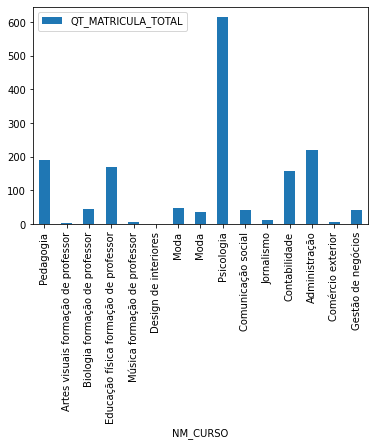

In [58]:
df_cesumar = df_maringa[:15]
df_cesumar.plot.bar(x='NM_CURSO', y='QT_MATRICULA_TOTAL')